In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [92]:
df=pd.read_csv("RTA Dataset.csv")

In [93]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

#### Data Handling

In [5]:
# Check for missing values
print(df.isnull().sum())

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [95]:
# drop missing values
df = df.dropna()

In [96]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
12,17:45:00,Thursday,18-30,Male,Junior high school,Employee,1-2yr,Public (> 45 seats),Owner,2-5yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
13,17:45:00,Thursday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Above 10yr,...,Waiting to go,na,na,na,na,Other,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
14,17:45:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury


In [97]:
# Check for missing values
print(df.isnull().sum())

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [120]:
df = df.drop_duplicates()

In [99]:
#Distribution of Accident severity
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     2466
Serious Injury     392
Fatal injury        31
Name: count, dtype: int64

#### Data Analysis

In [119]:
features = df[['Weather_conditions', 'Road_surface_conditions', 'Hour']]
target = df['Accident_severity']
encoder = OneHotEncoder()
features_encoded = encoder.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        12
Serious Injury       0.17      0.02      0.03       106
 Slight Injury       0.86      0.99      0.92       749

      accuracy                           0.85       867
     macro avg       0.34      0.34      0.32       867
  weighted avg       0.77      0.85      0.80       867

[[  0   0  12]
 [  0   2 104]
 [  0  10 739]]


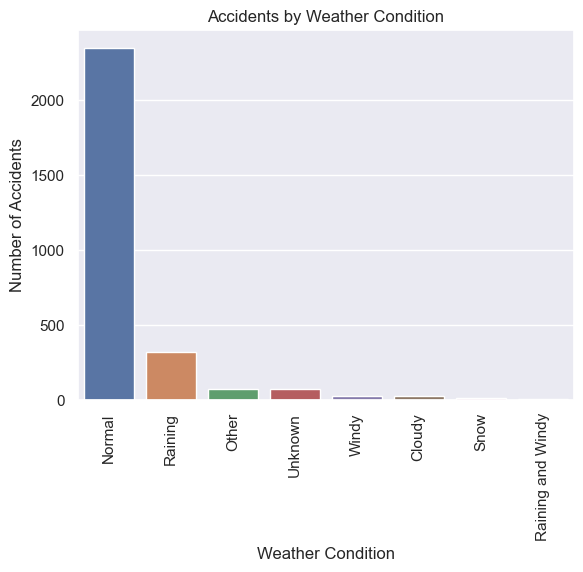

In [118]:
weather_counts = df['Weather_conditions'].value_counts()
sns.barplot(x=weather_counts.index, y=weather_counts.values)
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()

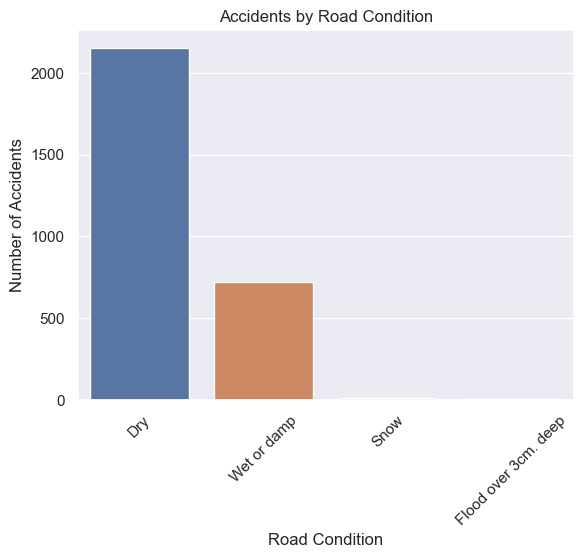

In [117]:
road_condition_counts = df['Road_surface_conditions'].value_counts()
sns.barplot(x=road_condition_counts.index, y=road_condition_counts.values)
plt.title('Accidents by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

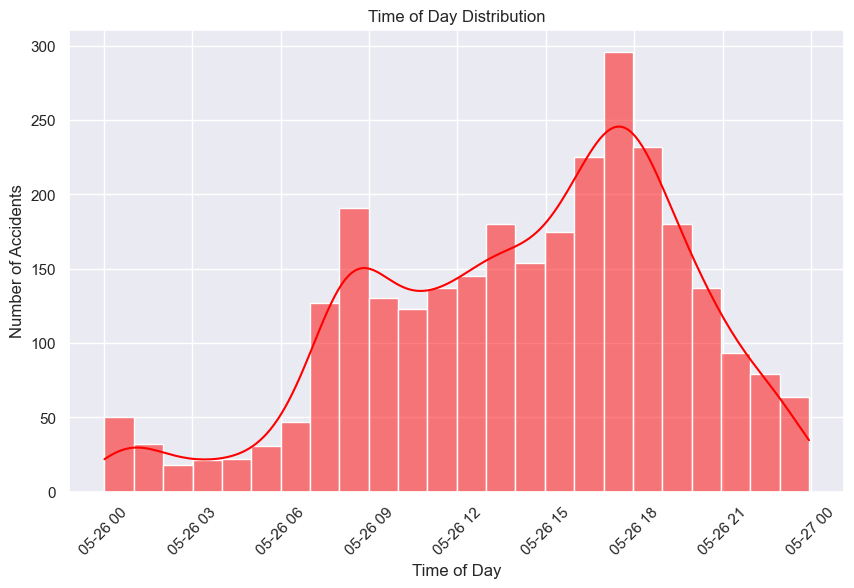

In [116]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Time', data=df, bins=24, kde=True, color='red')
plt.title('Time of Day Distribution')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

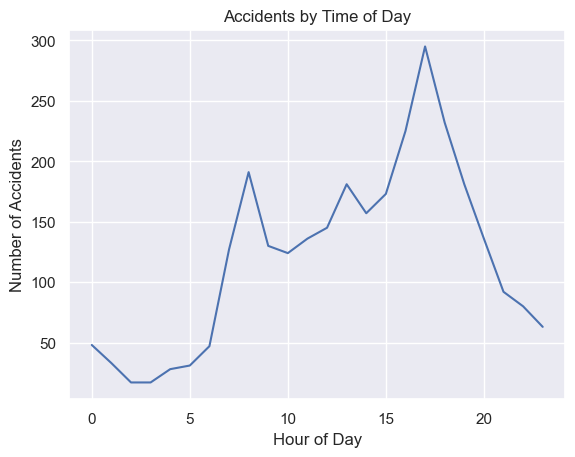

In [115]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
hourly_counts = df['Hour'].value_counts().sort_index()

sns.lineplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

#### Visualizations

Text(0.5, 1.0, 'Accident severity Distribution Plot')

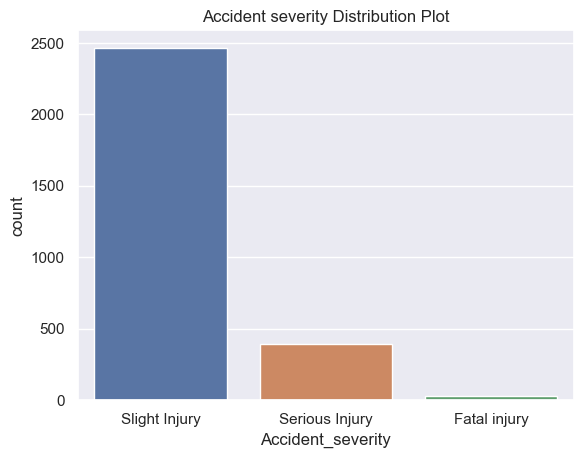

In [105]:
#plotting the final class
sns.countplot(x = df['Accident_severity'])
plt.title('Accident severity Distribution Plot')

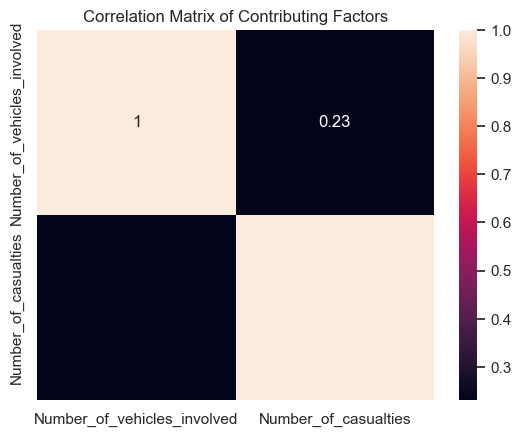

In [114]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Contributing Factors')
plt.show()

Text(0.5, 0, 'Count')

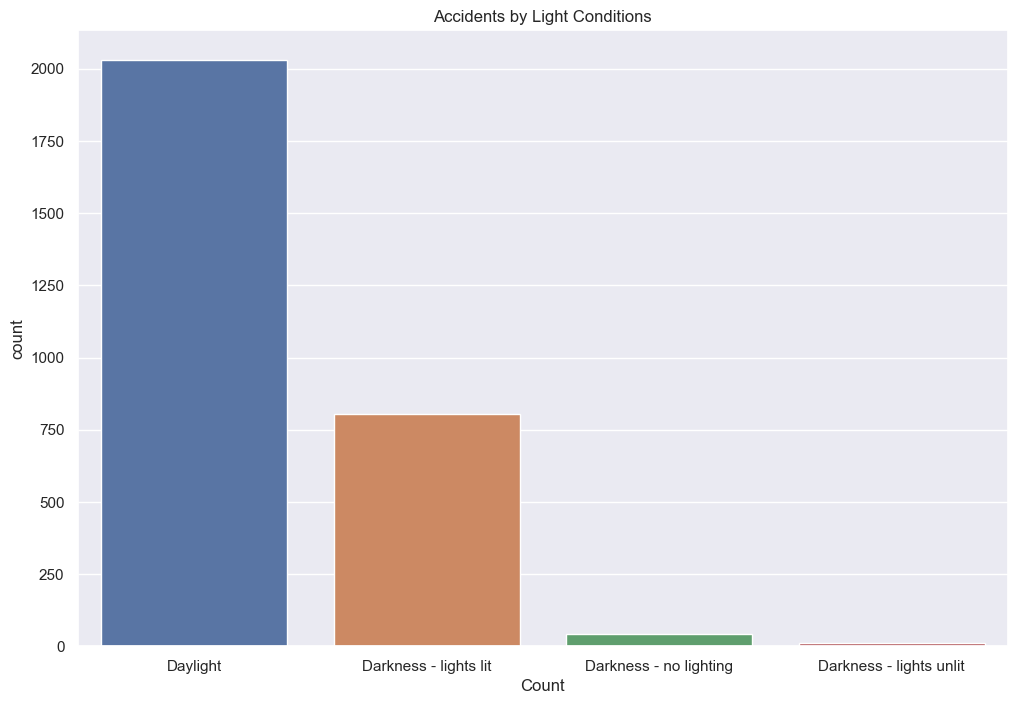

In [111]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Light_conditions', data=df, order=df['Light_conditions'].value_counts().index)
plt.title('Accidents by Light Conditions')
plt.xlabel('Count')

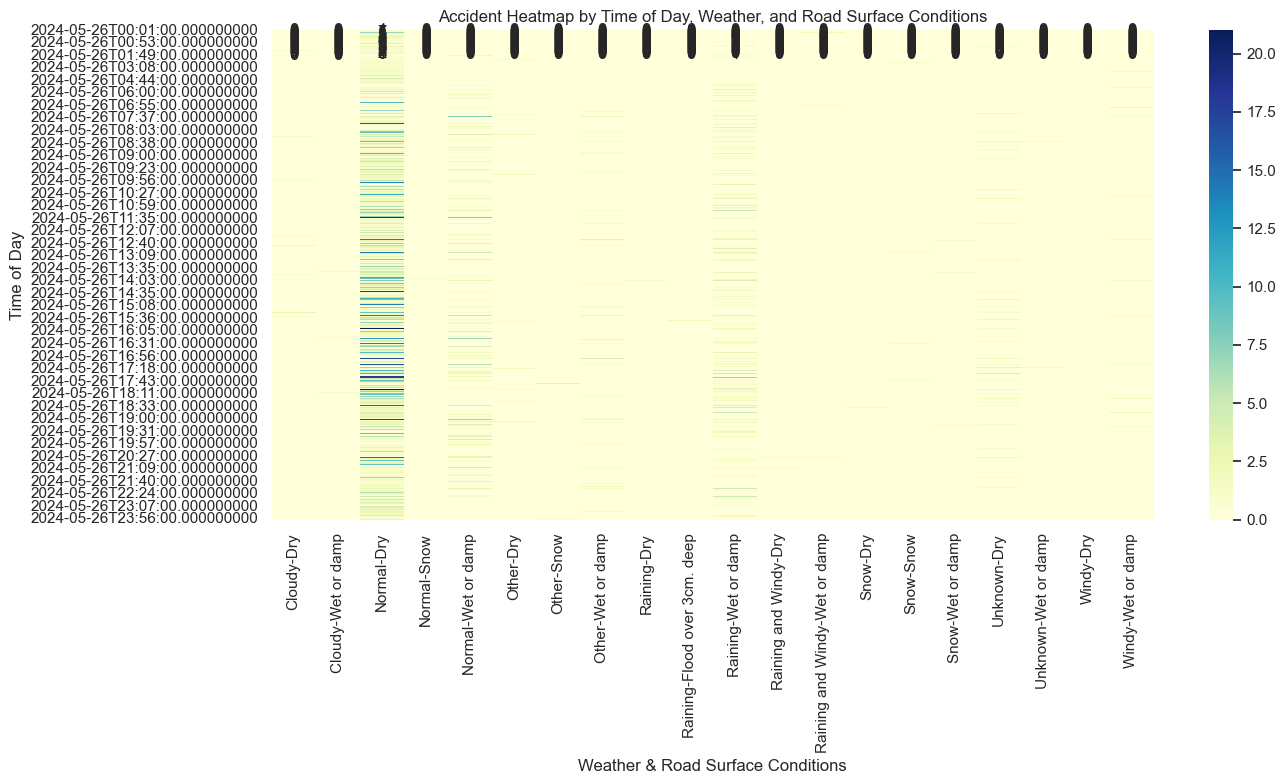

In [108]:
grouped_data = df.groupby(['Time', 'Weather_conditions', 'Road_surface_conditions']).size().reset_index(name='Accident_Count')

# Visualize accident hotspots and contributing factors using a heatmap
pivot_table = grouped_data.pivot_table(index='Time', columns=['Weather_conditions', 'Road_surface_conditions'], values='Accident_Count', fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Accident Heatmap by Time of Day, Weather, and Road Surface Conditions')
plt.xlabel('Weather & Road Surface Conditions')
plt.ylabel('Time of Day')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

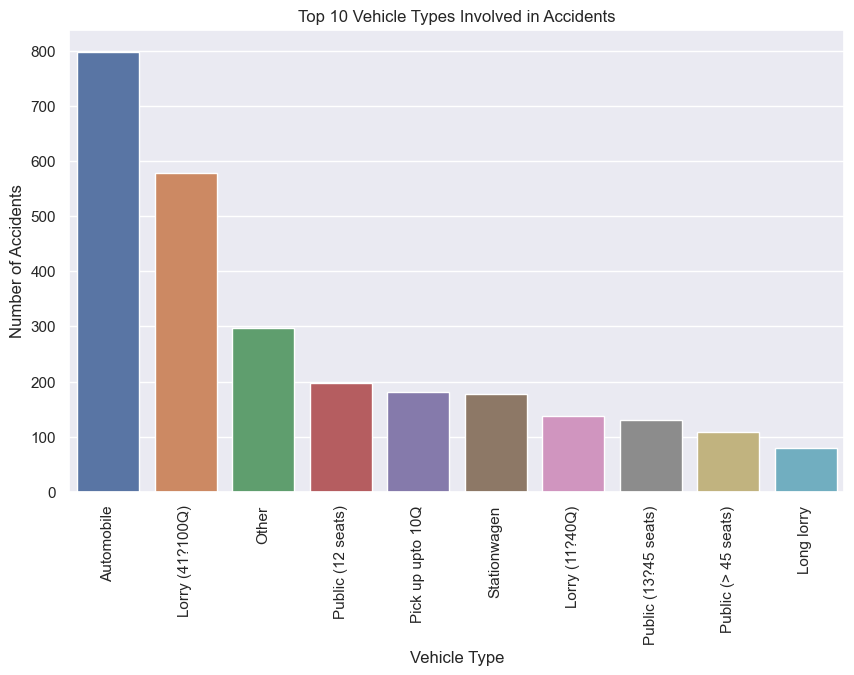

In [112]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type_of_vehicle', data=df, order=df['Type_of_vehicle'].value_counts().index[:10])
plt.title('Top 10 Vehicle Types Involved in Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()

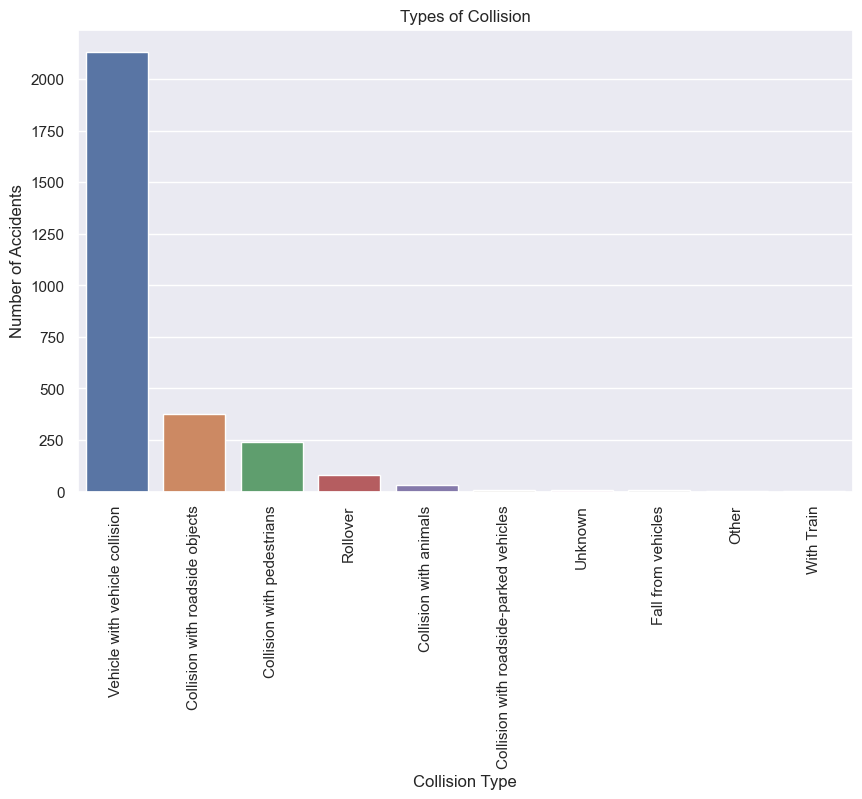

In [113]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type_of_collision', data=df, order=df['Type_of_collision'].value_counts().index)
plt.title('Types of Collision')
plt.xlabel('Collision Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()